In [61]:
import numpy as np


## Prepare the data for the calculations

In [62]:
# Define the start and end values, as well as the increment
start_value = 0.01
end_value = 1000
increment = 0.01

In [63]:
# Create an array of data points
data_points = np.arange(start_value, end_value + increment, increment)

In [64]:
# Print the first few data points as an example
print(data_points[:10])  # This will print the first 10 data points
print(len(data_points))


[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
100000


### (a) Compute σ2 of the population D. Let’s call σ2 the true variance of the population D.

In [65]:
meanofallpoints = sum(data_points)/len(data_points)
print(meanofallpoints)

500.005


In [66]:
def calculate_variance(data_points):
    # Calculate the mean (average) of the data points
    mean = sum(data_points) / len(data_points)

    # Calculate the squared differences from the mean
    squared_diff = [(x - mean) ** 2 for x in data_points]

    # Calculate the variance as the average of the squared differences
    variance = sum(squared_diff) / len(data_points)

    return variance


In [67]:

true_variance = calculate_variance(data_points)
print("Variance:", true_variance)


Variance: 83333.333325


True variance of population : 83333.333325

#### Random generator

In [68]:
import time

class SimpleRandom:
    def __init__(self, seed=None):
        if seed is None:
            seed = int(time.time() * 1000000) % 1000000
        self.state = seed

    def rand(self):
        a = 1664525
        c = 1013904223
        m = 2**32
        self.state = (a * self.state + c) % m
        return self.state
    def randrange(self, start, stop):

        range_size = stop - start
        rand_num = self.rand() % range_size
        return start + rand_num

    

In [69]:
random_generator = SimpleRandom()
print(random_generator)

#### Use sampling with replacement, to randomly sample 50 points {y1, . . . , y50} from the population D, i.e., for 1 ≤ i ≤ 50, yi ∈ D. Compute s1, s2 and s3 defined as

### Choosing random 50 points

In [70]:
# Number of iterations
num_iterations = 10  # You can change this to the desired number of iterations

In [71]:
fiftypoints= []
totalpoints = 100000

In [72]:
# Choose 50 unique indexes without repetition
while len(fiftypoints) < 50 :
    index = random_generator.rand() % totalpoints
    # if index not in fiftyindex:
    fiftypoints.append(data_points[index])


In [73]:
print(fiftypoints)

[155.23999999999998, 449.67, 237.57999999999998, 915.9300000000001, 27.6, 871.95, 209.46, 90.21000000000001, 49.08, 41.43, 255.57999999999998, 603.05, 737.12, 266.27, 647.3, 856.69, 949.96, 100.07000000000001, 643.82, 164.41, 873.84, 421.23, 258.9, 4.61, 479.0, 600.3100000000001, 145.66, 885.13, 896.32, 264.51, 559.14, 916.69, 201.0, 926.47, 831.1800000000001, 901.85, 23.76, 225.54999999999998, 864.5, 818.21, 563.96, 790.87, 244.06, 357.61, 934.5600000000001, 386.27, 290.18, 582.45, 576.84, 126.31]


In [74]:
meanoffiftypoints = sum(fiftypoints) /50
print( meanoffiftypoints)

484.4677999999999


In [75]:
numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]

In [76]:
print(numerators)

[108390.94429283992, 1210.8868848399918, 60953.585788839955, 186159.63002884015, 208728.1866768399, 150142.45531684012, 75629.29006083992, 155439.21286083988, 189562.53638883992, 196282.4922288399, 52389.62498883996, 14061.738156840014, 63833.134164840056, 47610.27992483996, 26514.325356840018, 138549.36617284012, 216682.98826084012, 147761.66864483993, 25393.12364484005, 102436.99534083996, 151610.71013284012, 3999.0193488399846, 50880.83239683996, 230263.5082208399, 29.89683683999888, 13419.415300840037, 114790.72534083996, 160530.19850884008, 169622.23464484012, 48381.43378083996, 5575.937452840013, 186816.03017284014, 80353.99363683994, 195365.9448048401, 120209.34962884012, 174207.9008768401, 212251.67698083993, 67038.42715683997, 144424.4730368401, 111383.85606084009, 6319.009860840022, 93882.30816484007, 57795.91030083995, 16092.901420839971, 202582.98850084015, 9642.807924839983, 37747.74922883996, 9600.51151684003, 8532.623332840025, 128277.00970083993]


In [77]:
numerator_after_addsquare_mean = sum(numerators)

In [78]:
print(numerator_after_addsquare_mean)

4979361.849458


In [79]:
s1square = numerator_after_addsquare_mean/51
print("s1square is " , s1square)

s1square is  97634.54606780391


In [80]:
s2square = numerator_after_addsquare_mean/50
print("s2square is " , s2square)

s2square is  99587.23698916


In [81]:
s3square = numerator_after_addsquare_mean/ 49
print("s3square is " , s3square)

s3square is  101619.62958077551


-----------------------------------------------------------------------------------------------------------------------------

##  Repeat (b) for multiple iterations and maintain the average scores, i.e., Avgs2 1 , Avgs2 2 & Avgs2 3 .

In [82]:
import matplotlib.pyplot as plt

In [83]:
# Initialize average scores
avg_s1_squared = 0
avg_s2_squared = 0
avg_s3_squared = 0

In [84]:
# Number of iterations
num_iterations = 10  # You can change this to the desired number of iterations

In [85]:
list_of_average_s1_2 , list_of_average_s2_2 , list_of_average_s3_2 = [],[],[]

In [86]:
iterations = []

In [87]:
# Perform multiple iterations
# plotting every 20 , 5 times
iteration_count = 0
for iteration in range(num_iterations):
    avg_s1_squared = 0 
    avg_s2_squared = 0 
    avg_s3_squared = 0
    for t in range (20):
        # Perform sampling with replacement to randomly select 50 points from the population
        fiftypoints= []
        totalpoints = 100000
        sample_size = 50
        # Choose 50 unique indexes without repetition
        while len(fiftypoints) < 50 :
            index = random_generator.rand() % totalpoints
            # if index not in fiftyindex:
            fiftypoints.append(data_points[index])

        meanoffiftypoints = sum(fiftypoints) /50
        numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]
        numerator_after_addsquare_mean = sum(numerators)
        
        # Calculate s^2_1, s^2_2, and s^2_3 for the current iteration
        s1_squared = numerator_after_addsquare_mean/51 # Sample variance with population correction
        s2_squared = numerator_after_addsquare_mean/50  # Sample variance with Bessel's correction
        s3_squared = numerator_after_addsquare_mean/49  # Sample variance with another degree of freedom
        avg_s1_squared += (s1_squared)
        avg_s2_squared += (s2_squared)
        avg_s3_squared += (s3_squared)
    
    iteration_count += 20
    iterations.append(iteration_count)
        
    avg_s1_squared = avg_s1_squared / 20
    avg_s2_squared = avg_s2_squared / 20
    avg_s3_squared = avg_s3_squared / 20
    list_of_average_s1_2.append(avg_s1_squared)
    list_of_average_s2_2.append(avg_s2_squared)
    list_of_average_s3_2.append(avg_s3_squared)
    
    



In [88]:
# Print the average scores after multiple iterations
print("Average s^2_1:", list_of_average_s1_2)
print("Average s^2_2:", list_of_average_s2_2)
print("Average s^2_3:", list_of_average_s3_2)


Average s^2_1: [77413.60879991374, 75177.4457434745, 78836.22218720784, 79892.73025848628, 80016.85883787452, 81020.86388797649, 79929.92315737254, 78771.2561896549, 80058.0422249804, 81034.55937785884]
Average s^2_2: [78961.88097591202, 76680.994658344, 80412.94663095198, 81490.58486365603, 81617.19601463199, 82641.281165736, 81528.52162052001, 80346.68131344802, 81659.20306948002, 82655.25056541602]
Average s^2_3: [80573.34793460408, 78245.91291667757, 82054.02717444082, 83153.65802413879, 83282.8530761551, 84327.83792422041, 83192.36900053061, 81986.40950351837, 83325.71741783674, 84342.0924136898]


### (d) Use three different scatter plots to visualize the change in Avgs2 i , for 1 ≤ i ≤ 3 over increasing number of iterations and compare it with σ2 the true variance of D.

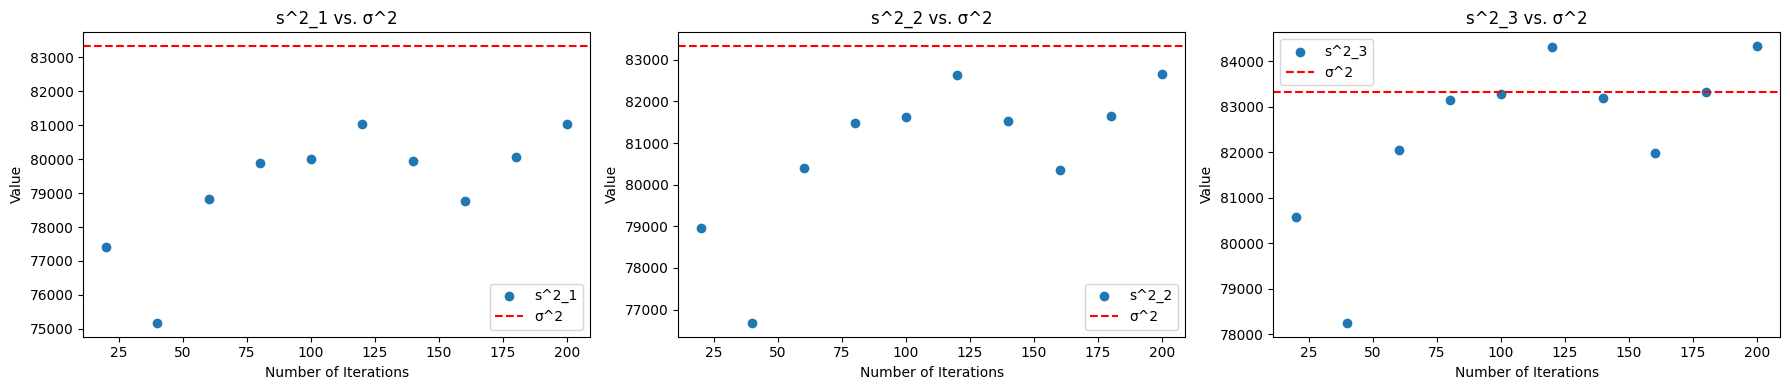

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 4))

# Scatter plot for s^2_1
plt.subplot(131)
plt.scatter(iterations, list_of_average_s1_2, label='s^2_1', marker='o')
plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')

# plt.plot(iterations, true_variance, label='σ^2', linestyle='--', color='red')
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.title('s^2_1 vs. σ^2')
plt.legend()

plt.subplot(132)
plt.scatter(iterations, list_of_average_s2_2, label='s^2_2', marker='o')
plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.title('s^2_2 vs. σ^2')
plt.legend()

plt.subplot(133)
plt.scatter(iterations, list_of_average_s3_2, label='s^2_3', marker='o')
plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.title('s^2_3 vs. σ^2')
plt.legend()

plt.tight_layout()
plt.show()


## part e Repeat (b), (c) & (d) multiple times and notice among Avgs2 1, Avgs2 2 and Avgs2 3 which score approaches to the true variance much quickly or frequently. Argue its reason.

# Repeating the same experiment 10 times and writing observation

Average s^2_1: [76505.19920738038, 82600.2710330745, 79695.15987536471, 82982.1738032706, 80528.54637199217, 78700.09697654119, 82729.10568556077, 77816.44779241568, 80667.95608003922, 78071.36052000783]
Average s^2_2: [78035.30319152799, 84252.27645373599, 81289.06307287197, 84641.817279336, 82139.11729943198, 80274.09891607199, 84383.68779927201, 79372.776748264, 82281.31520164001, 79632.78773040802]
Average s^2_3: [79627.86039951838, 85971.71066707754, 82948.02354374694, 86369.2013054449, 83815.42581574692, 81912.34583272654, 86105.80387680818, 80992.62933496326, 83960.52571595919, 81257.94666368162]


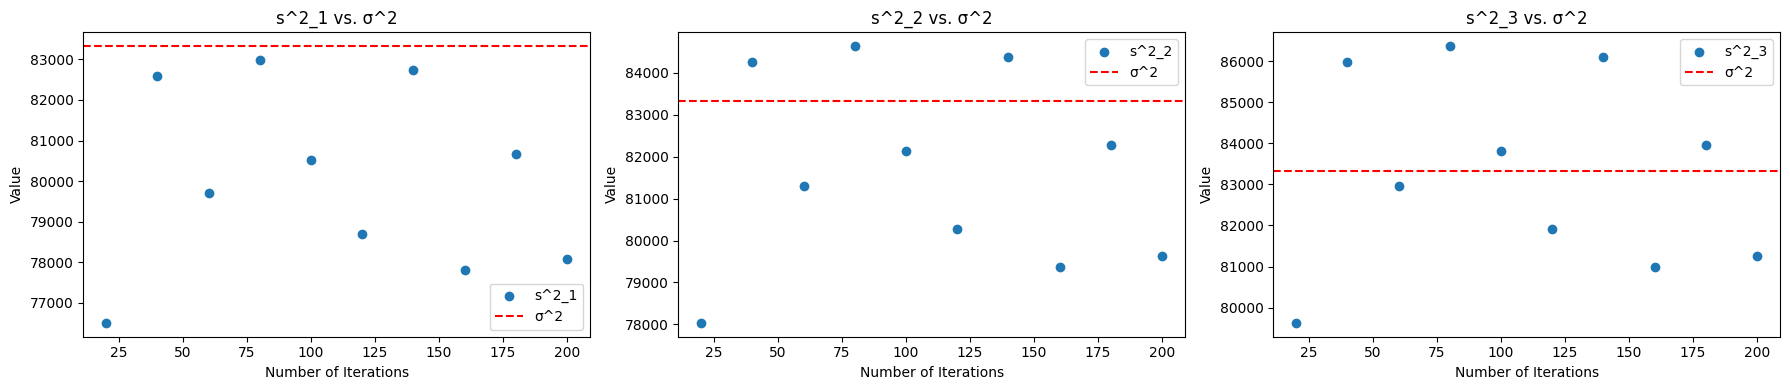

Average s^2_1: [79837.6731784549, 77718.35078686276, 77987.09835254116, 82574.25950378823, 77237.689247851, 78637.65680574902, 83329.01333105098, 82930.49791596076, 78612.21863552158, 81183.91394946666]
Average s^2_2: [81434.42664202402, 79272.71780260002, 79546.84031959201, 84225.744693864, 78782.443032808, 80210.40994186401, 84995.593597672, 84589.10787428002, 80184.46300823198, 82807.59222845601]
Average s^2_3: [83096.35371635102, 80890.52837, 81170.24522407349, 85944.63744271836, 80390.24799266123, 81847.35708353468, 86730.19754864488, 86315.4161982449, 81820.88062064491, 84497.54309026123]


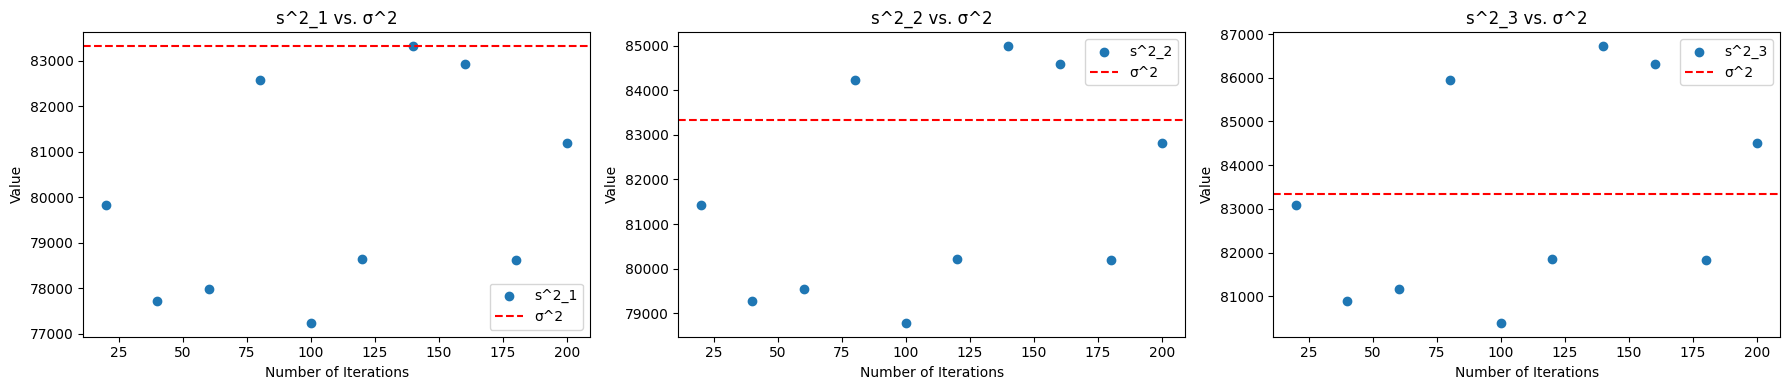

Average s^2_1: [79524.67924916864, 80747.61368116863, 78527.9364626588, 81262.00669663532, 78527.79560016471, 78007.72339285492, 79383.65751991372, 78597.47780967058, 79606.11922883922, 81361.12767031373]
Average s^2_2: [81115.17283415199, 82362.565954792, 80098.495191912, 82887.246830568, 80098.351512168, 79567.877860712, 80971.33067031199, 80169.427365864, 81198.24161341602, 82988.35022372]
Average s^2_3: [82770.5845246449, 84043.43464774694, 81733.15835909387, 84578.82329649795, 81733.01174711021, 81191.71210276736, 82623.8068064408, 81805.53812843264, 82855.3485851184, 84681.99002420409]


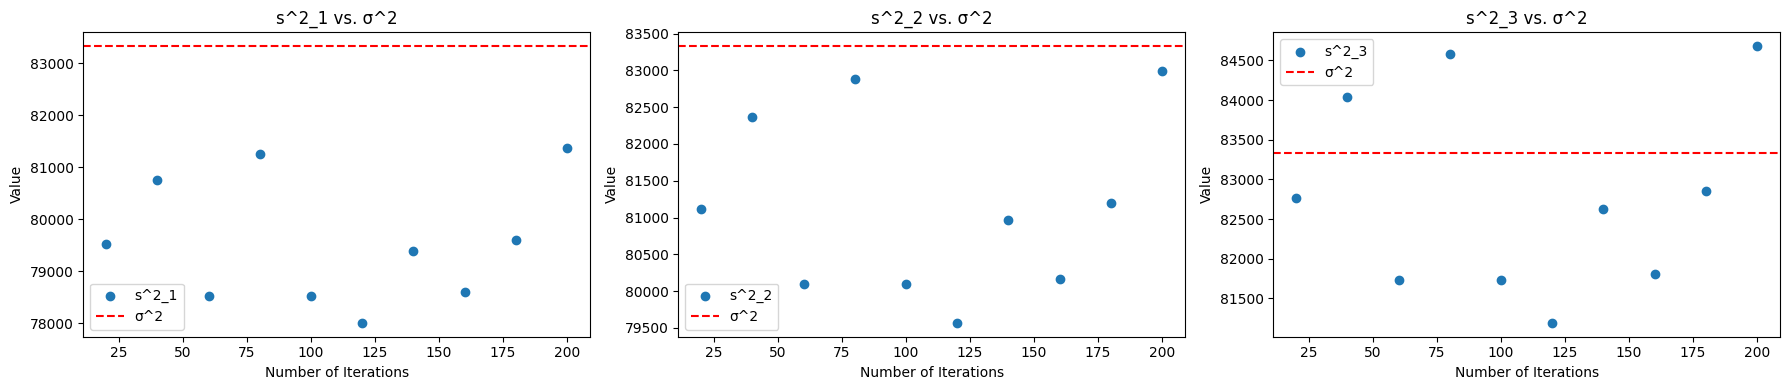

Average s^2_1: [80574.9519945804, 79518.51065434508, 80426.4287753804, 79008.7665111608, 80262.40669450196, 81898.05004057255, 78071.66556421175, 79545.28631828235, 74158.96722118433, 78370.96193842354]
Average s^2_2: [82186.451034472, 81108.880867432, 82034.95735088798, 80588.94184138399, 81867.654828392, 83536.01104138402, 79633.09887549603, 81136.192044648, 75642.14656560801, 79938.381177192]
Average s^2_3: [83863.7255453796, 82764.16415044082, 83709.14015396735, 82233.61412386122, 83538.42329427757, 85240.82759324898, 81258.2641586694, 82792.0326986204, 77185.86384245715, 81569.77671142042]


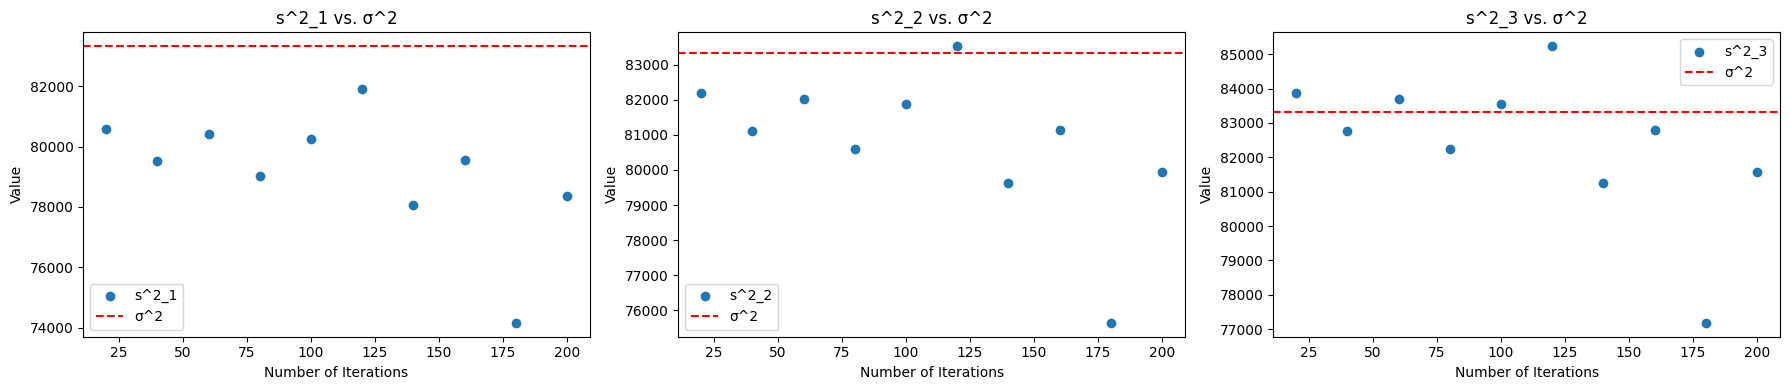

Average s^2_1: [80881.49664938822, 75884.93919608628, 78591.55944995294, 81341.59751476864, 81336.15538469805, 82453.32808192159, 82250.97576920001, 79892.57382711372, 77849.88576449412, 85162.98399056471]
Average s^2_2: [82499.126582376, 77402.637980008, 80163.390638952, 82968.42946506401, 82962.878492392, 84102.39464356001, 83895.99528458402, 81490.425303656, 79406.88347978401, 86866.24367037599]
Average s^2_3: [84182.78222691429, 78982.28365306939, 81799.37820301225, 84661.66271945306, 84655.9984616245, 85818.77004444899, 85608.15845365715, 83153.49520781226, 81027.43212222858, 88639.02415344489]


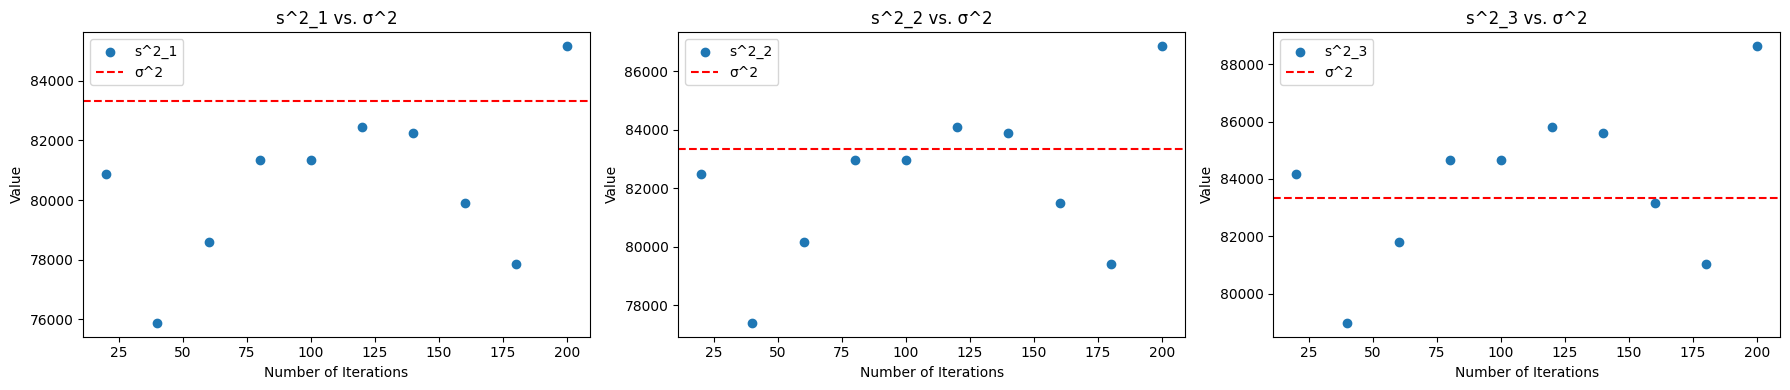

Average s^2_1: [80402.50495332548, 72577.4176058745, 78491.49167558432, 79107.25386601569, 77535.39463363921, 81619.72835373336, 83341.37844427451, 81211.59217553725, 78508.2833042588, 80986.60977817254]
Average s^2_2: [82010.555052392, 74028.96595799198, 80061.321509096, 80689.39894333601, 79086.102526312, 83252.12292080799, 85008.20601316003, 82835.82401904798, 80078.448970344, 82606.34197373601]
Average s^2_3: [83684.2398493796, 75539.76118162449, 81695.22602968982, 82336.121370751, 80700.10461868573, 84951.14583755916, 86743.06736036735, 84526.35103984489, 81712.70303096327, 84292.1856874857]


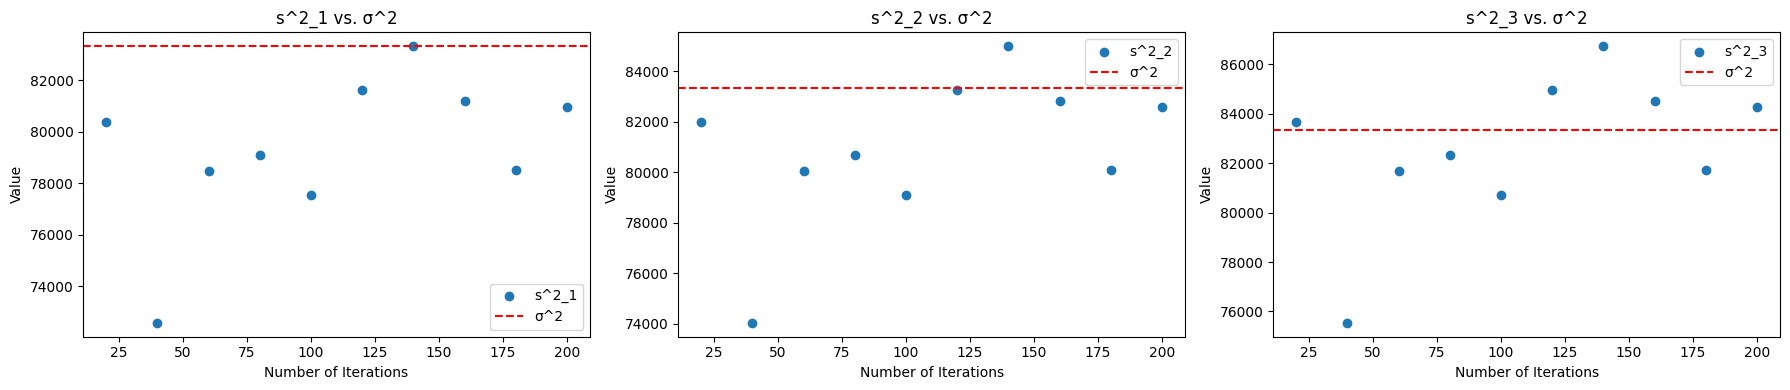

Average s^2_1: [81364.18866883921, 79954.96203680786, 81360.02122388233, 80383.26745472157, 81734.6787450745, 80712.21301180392, 75935.4896981098, 79529.61975451765, 80843.31806491765, 77888.40111470588]
Average s^2_2: [82991.47244221599, 81554.06127754401, 82987.22164836, 81990.93280381602, 83369.37231997598, 82326.45727204, 77454.199492072, 81120.21214960799, 82460.18442621599, 79446.169137]
Average s^2_3: [84685.17596144488, 83218.42987504491, 84680.83841669388, 83664.21714675103, 85070.78808160817, 84006.58905310204, 79034.89744088979, 82775.72668327349, 84143.04533287346, 81067.51952755102]


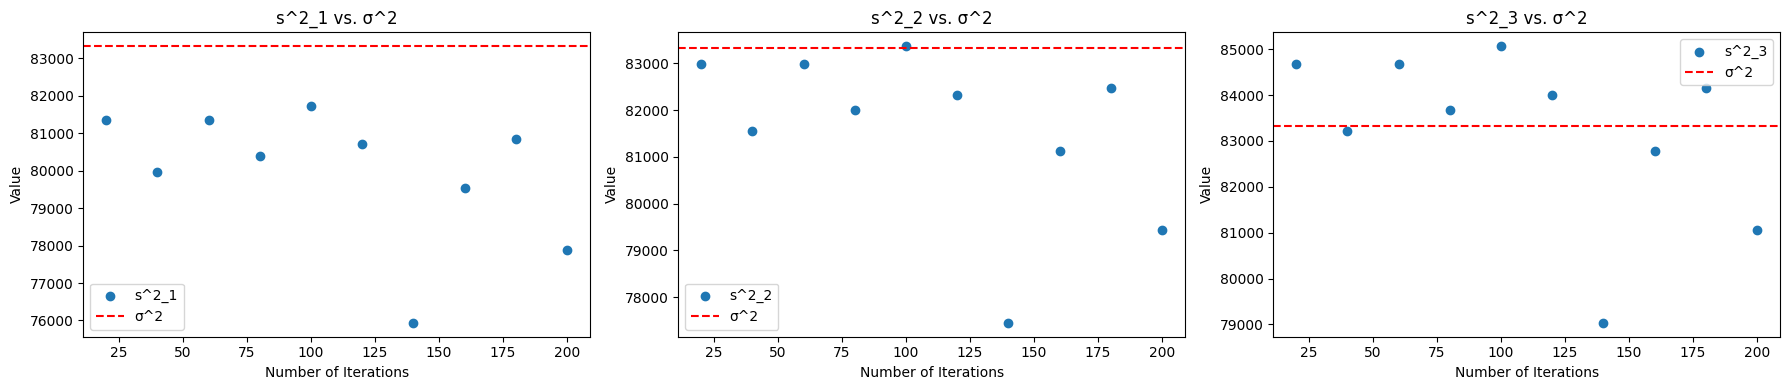

Average s^2_1: [76571.79117111371, 81341.45074846277, 79907.19085073726, 80122.2042517098, 81928.71607978824, 79823.56243862744, 78360.05153716863, 82192.22284044707, 81220.59872173335, 79867.54774221961]
Average s^2_2: [78103.226994536, 82968.27976343199, 81505.334667752, 81724.648336744, 83567.29040138399, 81420.03368739999, 79927.252567912, 83836.067297256, 82845.010696168, 81464.898697064]
Average s^2_3: [79697.17040258776, 84661.50996268573, 83168.70884464488, 83392.4983028, 85272.7453075347, 83081.66702795918, 81558.42098766532, 85547.00744617959, 84535.72520017144, 83127.44765006533]


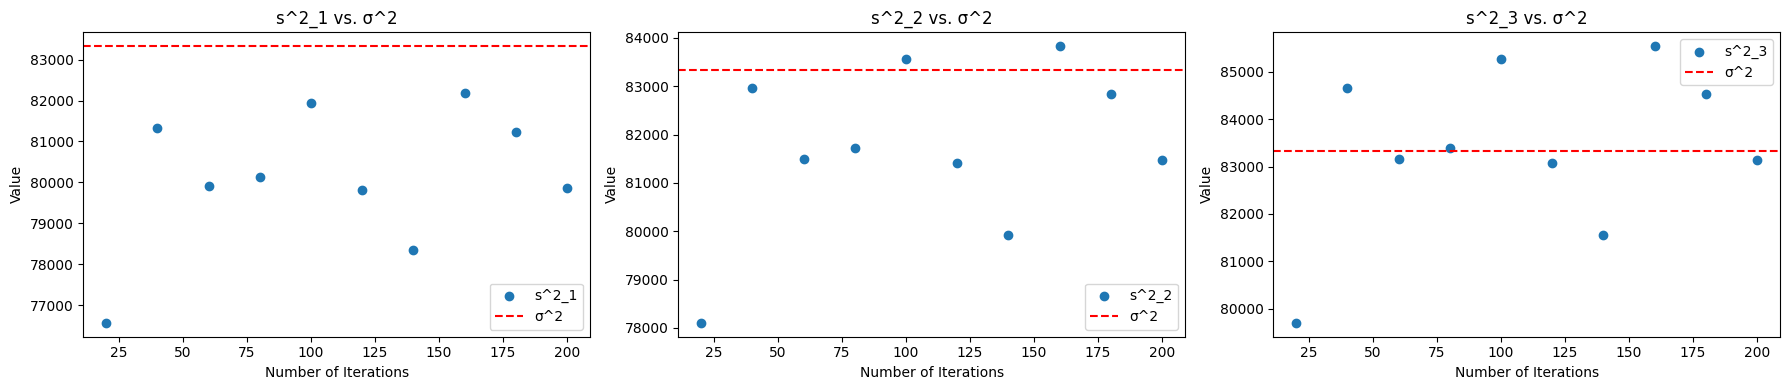

Average s^2_1: [78652.73071508236, 78840.62112198432, 79215.82088204706, 77969.38556621961, 80050.3801584706, 80569.6275581255, 78985.64269876861, 80682.81485801571, 79961.07833020392, 76362.51936876078]
Average s^2_2: [80225.785329384, 80417.43354442398, 80800.13729968801, 79528.77327754401, 81651.38776164, 82181.02010928799, 80565.355552744, 82296.47115517601, 81560.29989680799, 77889.769756136]
Average s^2_3: [81863.04625447346, 82058.60565757552, 82449.1196935592, 81151.80946688163, 83317.74261391835, 83858.18378498778, 82209.54648239184, 83975.9909746694, 83224.7958130694, 79479.35689401632]


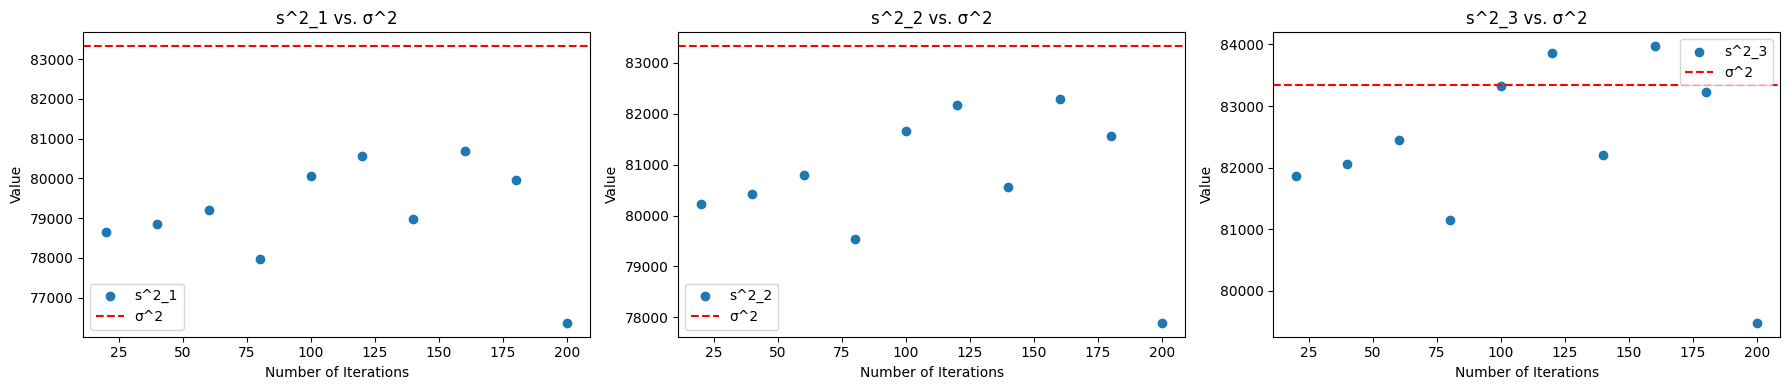

Average s^2_1: [78039.7183880549, 80517.30180603138, 81189.7643874902, 78621.76281585098, 80435.02376342745, 75045.55276044706, 81449.57776323923, 75773.31829368627, 81859.78789970982, 83069.21163881569]
Average s^2_2: [79600.512755816, 82127.647842152, 82813.55967524, 80194.19807216799, 82043.72423869601, 76546.46381565601, 83078.56931850403, 77288.78465955998, 83496.98365770403, 84730.59587159201]
Average s^2_3: [81225.01301613878, 83803.7222879102, 84503.63232167346, 81830.81435935512, 83718.08595785307, 78108.63654658776, 84774.05032500408, 78866.10679546937, 85201.00373235102, 86459.79170570613]


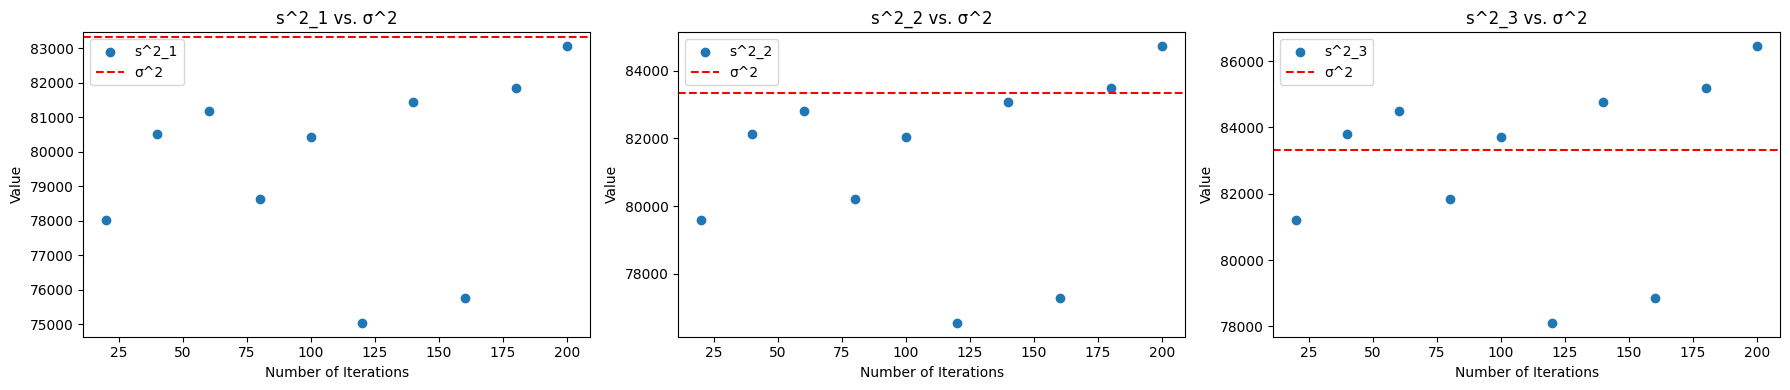

In [60]:
for x in range(10): 
   # Initialize average scores
    avg_s1_squared = 0
    avg_s2_squared = 0
    avg_s3_squared = 0
    # Number of iterations
    num_iterations = 10  # You can change this to the desired number of iterations
    list_of_average_s1_2 , list_of_average_s2_2 , list_of_average_s3_2 = [],[],[]
    iterations = []
    # Perform multiple iterations
    # plotting every 20 , 5 times
    iteration_count = 0
    for iteration in range(num_iterations):
        avg_s1_squared = 0 
        avg_s2_squared = 0 
        avg_s3_squared = 0
        for t in range (20):
            # Perform sampling with replacement to randomly select 50 points from the population
            fiftypoints= []
            totalpoints = 100000
            sample_size = 50
            # Choose 50 unique indexes without repetition
            while len(fiftypoints) < 50 :
                index = random_generator.rand() % totalpoints
                # if index not in fiftyindex:
                fiftypoints.append(data_points[index])

            meanoffiftypoints = sum(fiftypoints) /50
            numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]
            numerator_after_addsquare_mean = sum(numerators)
            
            # Calculate s^2_1, s^2_2, and s^2_3 for the current iteration
            s1_squared = numerator_after_addsquare_mean/51 # Sample variance with population correction
            s2_squared = numerator_after_addsquare_mean/50  # Sample variance with Bessel's correction
            s3_squared = numerator_after_addsquare_mean/49  # Sample variance with another degree of freedom
            avg_s1_squared += (s1_squared)
            avg_s2_squared += (s2_squared)
            avg_s3_squared += (s3_squared)
        iteration_count += 20
        iterations.append(iteration_count)
            
        avg_s1_squared = avg_s1_squared / 20
        avg_s2_squared = avg_s2_squared / 20
        avg_s3_squared = avg_s3_squared / 20
        list_of_average_s1_2.append(avg_s1_squared)
        list_of_average_s2_2.append(avg_s2_squared)
        list_of_average_s3_2.append(avg_s3_squared)
        
        
    # Print the average scores after multiple iterations
    print("Average s^2_1:", list_of_average_s1_2)
    print("Average s^2_2:", list_of_average_s2_2)
    print("Average s^2_3:", list_of_average_s3_2)

    # import matplotlib.pyplot as plt

    plt.figure(figsize=(18, 4))

    # Scatter plot for s^2_1
    plt.subplot(131)
    plt.scatter(iterations, list_of_average_s1_2, label='s^2_1', marker='o')
    plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')

    # plt.plot(iterations, true_variance, label='σ^2', linestyle='--', color='red')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value')
    plt.title('s^2_1 vs. σ^2')
    plt.legend()

    plt.subplot(132)
    plt.scatter(iterations, list_of_average_s2_2, label='s^2_2', marker='o')
    plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value')
    plt.title('s^2_2 vs. σ^2')
    plt.legend()

    plt.subplot(133)
    plt.scatter(iterations, list_of_average_s3_2, label='s^2_3', marker='o')
    plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value')
    plt.title('s^2_3 vs. σ^2')
    plt.legend()

    plt.tight_layout()
    plt.show()


## From the graphs, it's visible that s^2_3 , is reaching the true variance earliest.
## Degrees of freedom refer to the number of independent pieces of information available in a sample to estimate a parameter. In the context of variance estimates:


#### Since there is one less degree of freedom then n, because we have the sample variance is already defined
### However,  using (n - 1) degrees of freedom (as in s^2_3) should be done when estimating the population variance from a sample because it provides a less biased estimate of the true population variance. This correction accounts for the fact that you've already used one degree of freedom to calculate the sample mean.

## (as in s^2_2) , assume n degrees of freedom , but since we have defined , sample variance it doesn't take account of it  , and hence, the value is although close but not as close as 3rd one and doesn't reach it as fast as 3rd

## (as in s^2_1) , assume n+1 degrees of freedom , but since we have defined , sample variance it doesn't take account of it , and even after that it takes one more degree of freedom , and hence, the value is not even as close as second and reaches true_variance slower than 2nd one also , (even slower, and farther than 3rd)
 